In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
os.chdir('C:/Users/tientm3/Documents/Thesis/Combine-LLM-with-Symbolic-Solver-in-RAG')


# Logic inference

In [2]:
llama_3_8B_parse = pd.read_json('./outputs/logic_inference/results_Llama-3-8B.json') 
llama_3_70B_parse = pd.read_json('./outputs/logic_inference/results_Llama-3-70B.json')
mixtral_parse = pd.read_json('C:/Users/tientm3/Documents/Thesis/Combine-LLM-with-Symbolic-Solver-in-RAG/outputs/logic_inference/results_Mixtral-8x22B.json')
gpt_3_parse =  pd.read_json('./outputs/logic_inference/results_gpt-3.5-turbo.json')

In [3]:
# Number of correct sentences
num_llama_3_8b = len(llama_3_8B_parse[~llama_3_8B_parse['has_error'].notnull()])
num_llama_3_70b = len(llama_3_70B_parse[~llama_3_70B_parse['has_error'].notnull()])
num_mixtral = len(mixtral_parse[~mixtral_parse['has_error'].notnull()])
num_gpt3 = len(gpt_3_parse[~gpt_3_parse['has_error'].notnull()])

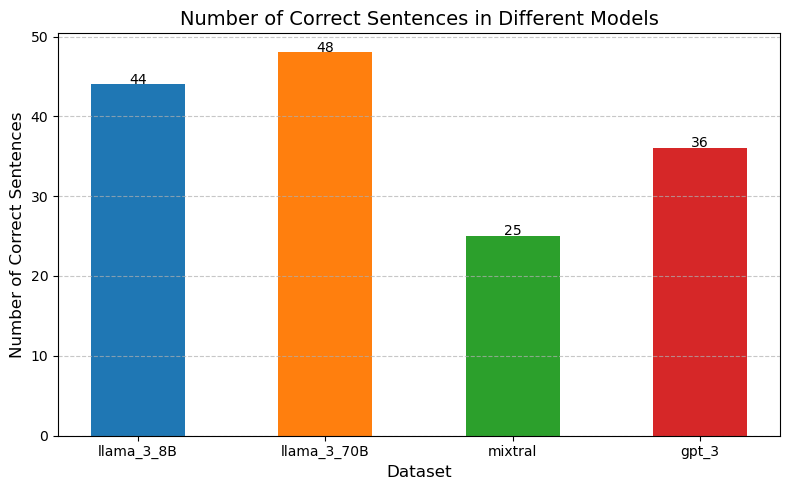

In [4]:
import matplotlib.pyplot as plt

# Dataset labels
datasets = ['llama_3_8B', 'llama_3_70B', 'mixtral', 'gpt_3']

# Number of correct sentences for each dataset
num_correct_sentences = [num_llama_3_8b, num_llama_3_70b, num_mixtral, num_gpt3]

# Define colors for the bars
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Plotting the bar chart with adjusted parameters for paper-like appearance
plt.figure(figsize=(8, 5))
bars = plt.bar(datasets, num_correct_sentences, color=colors, width=0.5)
plt.xlabel('Dataset', fontsize=12)
plt.ylabel('Number of Correct Sentences', fontsize=12)
plt.title('Number of Correct Sentences in Different Models', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels on top of each bar
for bar, num in zip(bars, num_correct_sentences):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, num, ha='center', fontsize=10)

plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()


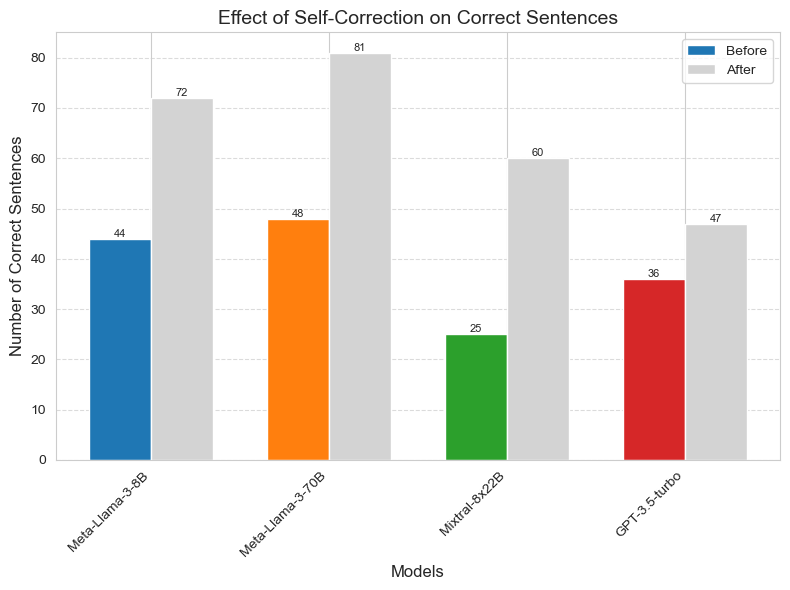

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Read refined data after self-correction
llama_3_8B_self_ref = pd.read_json('./outputs/self-refinement/refined_data_Llama-3-8B.json')
llama_3_70B_self_ref = pd.read_json('./outputs/self-refinement/refined_data_Llama-3-70B.json')
mixtral_self_ref = pd.read_json('./outputs/self-refinement/refined_data_Mixtral-8x22B.json')
gpt_3_self_ref = pd.read_json('./outputs/self-refinement/refined_data_gpt-3.5-turbo.json')

# Calculate the number of correct sentences after self-correction
num_llama_3_8b_self_ref = len(llama_3_8B_self_ref[~llama_3_8B_self_ref['has_error'].notnull()])
num_llama_3_70b_self_ref = len(llama_3_70B_self_ref[~llama_3_70B_self_ref['has_error'].notnull()])
num_mixtral_self_ref = len(mixtral_self_ref[~mixtral_self_ref['has_error'].notnull()])
num_gpt3_self_ref = len(gpt_3_self_ref[~gpt_3_self_ref['has_error'].notnull()])
# Model labels
models = ['Meta-Llama-3-8B', 'Meta-Llama-3-70B', 'Mixtral-8x22B', 'GPT-3.5-turbo']

# Number of correct sentences for each model (before and after self-correction)
num_correct_sentences_before = [num_llama_3_8b, num_llama_3_70b, num_mixtral, num_gpt3]
num_correct_sentences_after = [num_llama_3_8b_self_ref, num_llama_3_70b_self_ref, num_mixtral_self_ref, num_gpt3_self_ref]

# Define colors for the bars
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Plotting the bar chart with adjusted parameters for comparison
plt.figure(figsize=(8, 6))

bar_width = 0.35
index = np.arange(len(models))

# Plotting bars for number of correct sentences before self-correction
bars_before = plt.bar(index, num_correct_sentences_before, color=colors, width=bar_width, label='Before')

# Plotting bars for number of correct sentences after self-correction
bars_after = plt.bar(index + bar_width, num_correct_sentences_after, color='lightgrey', width=bar_width, label='After')

plt.xlabel('Models', fontsize=12)
plt.ylabel('Number of Correct Sentences', fontsize=12)
plt.title('Effect of Self-Correction on Correct Sentences', fontsize=14)
plt.xticks(index + bar_width / 2, models, rotation=45, fontsize=10, ha='right')  # Use model names as x-axis labels
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with number of correct sentences
for bars in [bars_before, bars_after]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

## Naive method

In [32]:
naive_llama_3_8b = pd.read_json('./baselines/outputs/naive/result_Llama-3-8B.json', lines=True)
naive_llama_3_70b = pd.read_json('./baselines/outputs/naive/result_Llama-3-70B.json', lines=True)
naive_mixtral = pd.read_json('./baselines/outputs/naive/result_Mixtral-8x22B.json', lines=True)
naive_gpt3 = pd.read_json('./baselines/outputs/naive/result_gpt-3.5-turbo.json', lines=True)


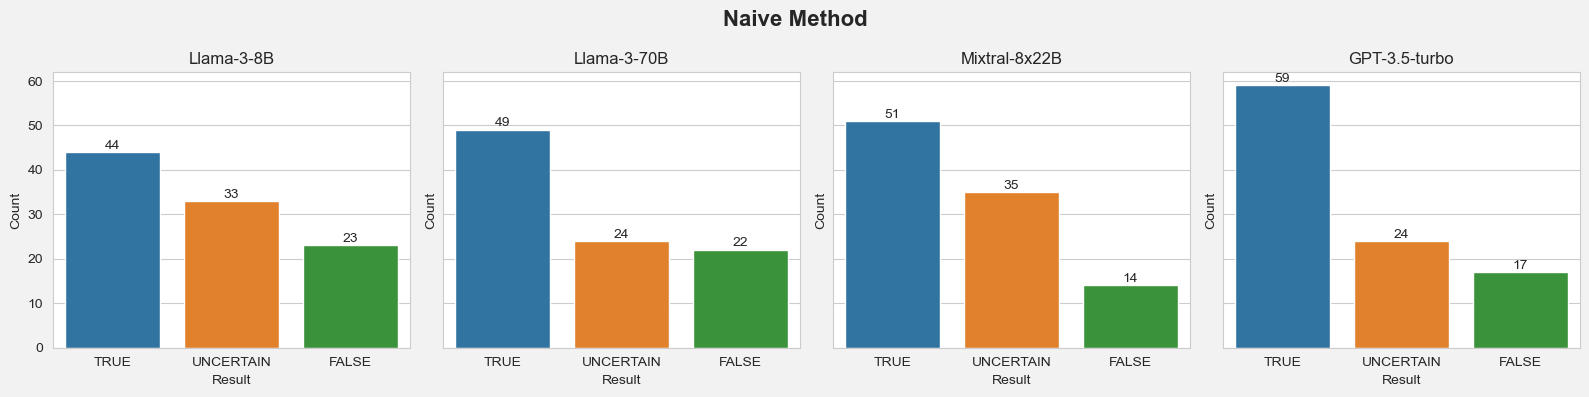

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate counts for each model
data = {
    "Llama-3-8B": naive_llama_3_8b['naive_result'].value_counts(),
    "Llama-3-70B": naive_llama_3_70b['naive_result'].value_counts(),
    "Mixtral-8x22B": naive_mixtral['naive_result'].value_counts(),
    "GPT-3.5-turbo": naive_gpt3['naive_result'].value_counts()
}

# Set paper-like color
paper_color = '#F2F2F2'  # Light gray color similar to paper background

# Set color palette using Tableau 10 colors
sns.set_palette("tab10")

# Plotting
fig, axes = plt.subplots(1, 4, figsize=(16, 4), facecolor=paper_color, sharey=True, sharex=True)

for i, (model, counts) in enumerate(data.items()):
    sns.barplot(x=counts.index, y=counts.values, ax=axes[i])
    axes[i].set_title(model)
    axes[i].set_xlabel('Result')
    axes[i].set_ylabel('Count')
    for j, v in enumerate(counts.values):
        axes[i].text(j, v + 0.1, str(v), ha='center', va='bottom')

plt.suptitle("Naive Method", fontsize=16, weight='bold')
plt.tight_layout()
plt.show()


## Symbolic K-vote

In [104]:

# Final result column based on majority vote# Merge the data frames on the 'Id' column
merged_df = pd.merge(llama_3_8B_self_ref, llama_3_70B_self_ref, on='id', suffixes=('_llama_3_8B', '_llama_3_70B'))
merged_df = pd.merge(merged_df, mixtral_self_ref, on='id')
merged_df = pd.merge(merged_df, gpt_3_self_ref, on='id', suffixes=('_mixtral', '_gpt_3'))

merged_df['total_true'] = merged_df[['prover9_result_llama_3_8B', 'prover9_result_llama_3_70B', 'prover9_result_mixtral', 'prover9_result_gpt_3']].apply(lambda row: sum(val == 'True' for val in row), axis=1)
merged_df['total_false'] = merged_df[['prover9_result_llama_3_8B', 'prover9_result_llama_3_70B', 'prover9_result_mixtral', 'prover9_result_gpt_3']].apply(lambda row: sum(val == 'False' for val in row), axis=1)

# Determine the majority vote
def majority_vote(row):
    if row['total_true'] > row['total_false']:
        return 'True'
    if row['total_false'] > row['total_true']:
        return 'False'
    return 'Uncertain'

merged_df['final_result'] = merged_df.apply(majority_vote, axis=1)

In [105]:
merged_df

,id,conclusion_llama_3_8B,premises_llama_3_8B,prover9_result_llama_3_8B,has_error_llama_3_8B,conclusion_llama_3_70B,premises_llama_3_70B,prover9_result_llama_3_70B,has_error_llama_3_70B,conclusion_mixtral,premises_mixtral,prover9_result_mixtral,has_error_mixtral,conclusion_gpt_3,premises_gpt_3,prover9_result_gpt_3,has_error_gpt_3,total_true,total_false,final_result
0,9b0ccfe7-97bf-4565-94ac-c26875f5a044,all x (VND20M(x) -> Declare(x)).,"[all x (US5000(x) -> DeclareAmount(x))., all x...",None,None,all x (Carry(x) & VND(x) & Abroad(x) & VND_val...,[all x (Carry(x) & VND(x) & Abroad(x) -> (Decl...,True,None,all x (Individual(x) & Exit(x) & Entry(x) & In...,[all x (Individual(x) & Exit(x) & Entry(x) & I...,None,End of input found. Expression expected.\n\n^,Declare(x) & Carry(x) & VietnameseCurrency(x) ...,[all x (Carry(x) & Cash(x) & ForeignCurrency(x...,None,Unexpected token: '>'. Expected token ')'.\nD...,1,0,True
1,7c2bdc89-9f2d-4ef3-9147-0cfc3d47d5c7,~Cryptocurrencies(x).,[all x (PaymentInstrument(x) -> (Cheque(x) | P...,None,None,all x (Cryptocurrency(x) -> Legitimate(x)).,[all x (PaymentInstrument(x) -> (~Illegal(x) <...,None,None,Please note that the conclusion is based on th...,[all x (PaymentInstrument(x) -> (Forging(x) | ...,None,None,all x (Cryptocurrencies(x) -> Recognized(x)).,[all x (PaymentInstrument(x) -> (Cheque(x) | P...,None,None,0,0,Uncertain
2,064d2f1d-03e5-4089-ba44-b7f4d0b1cea0,all x (~Permitted(x) -> Penalty(x)).,[all x (Trade(x) -> (Value(x) < USD(x) | Permi...,None,None,~all x (Trade(x) & Organization(x) & ~Authoriz...,[all x (Trade(x) & Individual(x) & Value(x) < ...,None,Unexpected token: '<'. Expected token ')'.\na...,all x (TradeForeignCurrency(x) & UnauthorizedO...,[all x (TradeForeignCurrency(x) & ValueUnderUS...,None,(FATAL)\n%%ERROR: The following symbols/aritie...,"?- all x (Trading(x, y) & Organization(x) & ~P...","[all x (Trading(x, y) & Individual(x) & Value(...",None,End of input found. Expected token ')'.\nall ...,0,0,Uncertain
3,e1946d8a-ebdb-49ba-964d-ba72fffe2433,all x (Open(x) -> (~CCCD(x))).,[all x (Open(x) -> (IDCard(x) | Passport(x) | ...,None,Unexpected token: 'x'. Expected token ')'.\na...,- all x (Open(x) -> CCCD(x)).,[all x (Open(x) -> (ApplicationForm(x) & (CCCD...,False,None,-Possible(x),"[all x (OpenAccount(x) -> ApplicationForm(x)),...",True,None,exists x (OpenAccount(x) & -CCCDCard(x)).,[all x (OpenAccount(x) -> (ApplicationForm(x) ...,False,None,1,2,False
4,9789c422-3ba7-469c-ba93-7ef37943ebbc,all x (Foreigner(x) -> not CarryGoldJewelry(x)).,[all x (Foreigner(x) -> (not CarryIngot(x) & n...,None,None,all x ((Foreigner(x) & Carry(x) & GoldJewelry(...,[all x ((Foreigner(x) & Carry(x) & IngotGold(x...,True,None,"Allow(Foreigner(x), Carry(x, Jewelry(y))) & En...","[-Carry(x, IngotGold(y)) | -Foreigner(x) | Ent...",None,End of input found. Expected token ')'.\n-Car...,all x (Foreigner(x) & Carry(GoldJewelry(x)) ->...,[all x ((Enter(x) | Exit(x)) & Carry(x) & (Ing...,None,End of input found. Expected token ')'.\nall ...,1,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,7a0ce6b7-0f8b-4e91-9290-489dd50f4e6d,all x (Adulterous(StateOfficial(x)) -> Fired(x)).,"[all x (Adulterous(x) -> HeldAccountable(x)).,...",None,Unexpected token: ']'. Expected token ')'.\na...,~all x (StateOfficial(x) -> (Adulterous(x) -> ...,"[all x (Accountable(x) -> Behavior(x))., all x...",None,None,all x (GovernmentEmployee(x) & Adulterous(x) -...,"[all x (Relationship(x, y) -> Accountable(x))....",None,End of input found. Expected token ')'.\nall ...,StateOfficial(x) & Adulterous(x) -> Fired(x).,"[all x (Relationship(x, y) & Behavior(x) & ~Pr...",None,End of input found. Expected token ')'.\nall ...,0,0,Uncertain
94,00a73256-3ab7-4bd2-82cf-abf218c4589e,all x (Forgery(x) -> Lawsuit(x)).,"[all x (Signature(x) -> AssetUser(x))., all x ...",False,None,all x (Forgery(x) -> -Legal(x)),"[all x (Mortgage(x) -> Signature(x))., all x (...",True,None,all x (Forgery(x) -> Laws

In [103]:
merged_df['final_result'].value_counts()

final_result
False        41
Uncertain    34
True         23
Name: count, dtype: int64

In [92]:
merged_df.head(20)


,id,conclusion_llama_3_8B,premises_llama_3_8B,prover9_result_llama_3_8B,has_error_llama_3_8B,conclusion_llama_3_70B,premises_llama_3_70B,prover9_result_llama_3_70B,has_error_llama_3_70B,conclusion_mixtral,...,prover9_result_mixtral,has_error_mixtral,conclusion_gpt_3,premises_gpt_3,prover9_result_gpt_3,has_error_gpt_3,total_true,total_false,total_none,final_result
0,9b0ccfe7-97bf-4565-94ac-c26875f5a044,all x (VND20M(x) -> Declare(x)).,"[all x (US5000(x) -> DeclareAmount(x))., all x...",None,None,all x (Carry(x) & VND(x) & Abroad(x) & VND_val...,[all x (Carry(x) & VND(x) & Abroad(x) -> (Decl...,True,None,all x (Individual(x) & Exit(x) & Entry(x) & In...,...,None,End of input found. Expression expected.\n\n^,Declare(x) & Carry(x) & VietnameseCurrency(x) ...,[all x (Carry(x) & Cash(x) & ForeignCurrency(x...,None,Unexpected token: '>'. Expected token ')'.\nD...,1,0,0,True
1,7c2bdc89-9f2d-4ef3-9147-0cfc3d47d5c7,~Cryptocurrencies(x).,[all x (PaymentInstrument(x) -> (Cheque(x) | P...,None,None,all x (Cryptocurrency(x) -> Legitimate(x)).,[all x (PaymentInstrument(x) -> (~Illegal(x) <...,None,None,Please note that the conclusion is based on th...,...,None,None,all x (Cryptocurrencies(x) -> Recognized(x)).,[all x (PaymentInstrument(x) -> (Cheque(x) | P...,None,None,0,0,0,Uncertain
2,064d2f1d-03e5-4089-ba44-b7f4d0b1cea0,all x (~Permitted(x) -> Penalty(x)).,[all x (Trade(x) -> (Value(x) < USD(x) | Permi...,None,None,~all x (Trade(x) & Organization(x) & ~Authoriz...,[all x (Trade(x) & Individual(x) & Value(x) < ...,None,Unexpected token: '<'. Expected token ')'.\na...,all x (TradeForeignCurrency(x) & UnauthorizedO...,...,None,(FATAL)\n%%ERROR: The following symbols/aritie...,"?- all x (Trading(x, y) & Organization(x) & ~P...","[all x (Trading(x, y) & Individual(x) & Value(...",None,End of input found. Expected token ')'.\nall ...,0,0,0,Uncertain
3,e1946d8a-ebdb-49ba-964d-ba72fffe2433,all x (Open(x) -> (~CCCD(x))).,[all x (Open(x) -> (IDCard(x) | Passport(x) | ...,None,Unexpected token: 'x'. Expected token ')'.\na...,- all x (Open(x) -> CCCD(x)).,[all x (Open(x) -> (ApplicationForm(x) & (CCCD...,False,None,-Possible(x),...,True,None,exists x (OpenAccount(x) & -CCCDCard(x)).,[all x (OpenAccount(x) -> (ApplicationForm(x) ...,False,None,1,2,0,False
4,9789c422-3ba7-469c-ba93-7ef37943ebbc,all x (Foreigner(x) -> not CarryGoldJewelry(x)).,[all x (Foreigner(x) -> (not CarryIngot(x) & n...,None,None,all x ((Foreigner(x) & Carry(x) & GoldJewelry(...,[all x ((Foreigner(x) & Carry(x) & IngotGold(x...,True,None,"Allow(Foreigner(x), Carry(x, Jewelry(y))) & En...",...,None,End of input found. Expected token ')'.\n-Car...,all x (Foreigner(x) & Carry(GoldJewelry(x)) ->...,[all x ((Enter(x) | Exit(x)) & Carry(x) & (Ing...,None,End of input found. Expected token ')'.\nall ...,1,0,0,True
5,290a8877-962e-4f88-94e9-875d9c0f9d98,all x (Burn(x) -> Illegal(x)).,[all x (Counterfeit(x) -> (Transport(x) | Stor...,True,None,all x (Burn(x) -> Illegal(x)).,[all x (Counterfeit(x) -> (Transport(x) | Stor...,True,None,all x (Destroy(x) -> Illegal(x)),...,True,None,-Destroy(x).,[all x (Counterfeit(x) -> (Transport(x) | Stor...,False,None,3,1,0,True
6,7fbf3cc8-1c9a-4a0c-9ede-ec20f362e60c,all x (Contract(x) & Lease(x) & House(x) & Sig...,[all x (Transaction(x) & Payment(x) & Posting(...,None,None,all x (Contract(x) & ForeignExchange(x) & Leas...,[all x (Transaction(x) & Vietnam(x) -> ~Foreig...,None,None,all x (LeaseContract(x) & ForeignExchange(x) -...,...,False,None,all x (Contract(x) & Sign(x) & Lease(x) & Hous...,[all x (Transaction(x) -> (Payment(x) | Postin...,False,None,0,2,0,False
7,6b1e724-2a30-49d9-8c43-ca7af168eea2,all x (Enterprise(x) & ~CreditInstitution(x) -...,[all x (Enterprise(x) -> Not(CashPayment(x) & ...,None,'utf-8' codec can't decode byte 0xc2 in positi...,all x (Enterprise(x) & Lending(x) -> ~CashPaym...,[all x (Enterprise(x) & CapitalContribution(x)...,None,None,all x (Enterprise(x) & ~CreditInstitution(x) -...,...,None,None,-Use(x) | Cash(x),[all x (Com

In [93]:
result = merged_df[['id', 'final_result']].rename(columns={'id':'Id'})

In [96]:
import pandas as pd
data = pd.read_json('./data/dataset.json')
result_data = result.merge(data).drop(columns=['STT'])

In [97]:
result_data.head(10)

,Id,final_result,Question,Law Context
0,9b0ccfe7-97bf-4565-94ac-c26875f5a044,True,Are customs declarations required when carryin...,Article 2 of the Circular No. 15/2011/TT-NHNN ...
1,7c2bdc89-9f2d-4ef3-9147-0cfc3d47d5c7,Uncertain,Is cryptocurrencies recognized as a legitimate...,6. Pursuant to Clause 6 and Clause 7 Article 4...
2,064d2f1d-03e5-4089-ba44-b7f4d0b1cea0,Uncertain,Is there any penalty or not for trading foreig...,1. Clause 1 Article 23 of Decree No. 88/2019/N...
3,e1946d8a-ebdb-49ba-964d-ba72fffe2433,False,Can you open a bank account without a CCCD card?,For personal checking accounts: - An applicati...
4,9789c422-3ba7-469c-ba93-7ef37943ebbc,True,Are foreigners allowed to bring gold jewellery...,1. Article 2 of Circular No. 11/2014/TT-NHNN p...
5,290a8877-962e-4f88-94e9-875d9c0f9d98,True,Is it illegal to burn money?,Article 3 of Decision No. 130/2003/QD-TTg prov...
6,7fbf3cc8-1c9a-4a0c-9ede-ec20f362e60c,False,Is it illegal to sign a contract in foreign cu...,Pursuant to Clause 13 Article 1 of the Ordinan...
7,6b1e724-2a30-49d9-8c43-ca7af168eea2,True,Is the company not allowed to use cash when le...,Financial transactions of enterprises 1. Enter...
8,0b1c6aeb-f312-4192-8b83-45f266e256c7,False,Is the undue debt a bad debt?,"in Clause 7 Article 3 of this Circular, the de..."
9,8121f6ab-4eb9-493e-8a64-2ecce6cbd45e,True,Did the officer in the line get a red line?,Clause 4 Article 68 of the Government's Decree...
